In [1]:
import numpy as np

import noise3d
from noise3d import spectrum as ns

In [2]:
#T = V = H = 100
T = 100
V = H = 100

#stds = (1, 1, 1, 1, 1, 1, 1)
stds = (1, 0, 0, 0, 0, 0, 0)
#stds = (1, 2, 3, 4, 5, 6, 7)
print([x**2 for x in stds])

seq = noise3d.genseq.genseq_3dnoise_seq(T, V, H, stds)

[1, 0, 0, 0, 0, 0, 0]


# Comparaison des résultats
On dispose de plusieurs méthodes :
 - méthode "Astrid" par sommes sur le cube de DFT
 - méthode spectrum compute var par somme sur les séquences de DFT DH
 - méthode classique par matrice
 - méthode corrected par matrice

In [3]:
meth_1 = noise3d.spectrum.var_psd_astrid(seq)
meth_11 = noise3d.spectrum.var_psd_astrid(seq, numeric_invert=True)
meth_2 = noise3d.noise.get_all_3d_corrected_var_matrix(seq)
meth_3 = noise3d.spectrum.compute_var(seq)
meth_4 = noise3d.noise.get_all_3d_classic_var_matrix(seq)
for a, b, c, d, e in zip(meth_1, meth_11, meth_2, meth_3, meth_4):
    print("---")
    print(a)
    print(b)
    print(c)
    print(d)
    print(e)
    
print("---")
print(np.sum(meth_1[0:-2]))
print(np.sum(meth_11[0:-2]))
print(np.sum(meth_2[0:-2]))
print(np.sum(meth_3[0:-2]))
print(np.sum(meth_4[0:-2]))

print("---")
print(np.sum(meth_1[-1]))
print(np.sum(meth_11[-1]))
print(np.sum(meth_2[-1]))
print(np.sum(meth_3[-1]))
print(np.sum(meth_4[-1]))




/Users/mocquin/Documents/CLE/Optique/Python/JUPYTER/MYLIB10/MODULES/noise3D/noise3d/spectrum.py:113: ComplexWarning: Casting complex values to real discards the imaginary part
  norm_psd = norm_psd.astype(np.float128, copy=False)


---
0.9524048834427158482
0.9524048834427158482
0.9524048834427157
0.9524048834427152
0.9524048834427155
---
0.0
0.0
-1.734723475976807e-18
2.1824018865687293e-34
1.8552625486462872e-40
---
-1.5655956678848807968e-34
-1.5655956678848807968e-34
2.510839899889164e-18
6.434727649380051e-35
4.174340734454146e-40
---
0.0
0.0
0.0
-2.182401886568729e-34
-0.00942975132121493
---
1.5822556483683758405e-32
1.5822556483683758405e-32
-1.9928045590864724e-16
1.651436048936981e-32
-0.009429751321215263
---
0.0
0.0
-1.1004219739813477e-17
-2.182401886568729e-34
-4.192709670579357e-40
---
0.0
0.0
1.066123193969905e-15
2.182401886568729e-34
0.009336396689781146
---
0.9524048834427158482
0.9524048834427158482
0.9524048834427166
0.9524048834427152
0.9428817774900664
---
0.9524048834427158482
0.9524048834427158482
0.9524048834427155
0.9524048834427152
0.9335453808002853
---
0.9524048834427158482
0.9524048834427158482
0.9524048834427166
0.9524048834427152
0.9428817774900664


# Timeit

In [4]:
# Méthode la plus rapide : matrix corrected, puis astrid, puis DH

%timeit noise3d.noise.get_all_3d_corrected_var_matrix(seq)
%timeit noise3d.spectrum.var_psd_astrid(seq)
%timeit noise3d.spectrum.var_psd_astrid(seq, numeric_invert=True)
%timeit noise3d.spectrum.compute_var(seq)

9.12 ms ± 1.19 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
53.6 ms ± 2.07 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
53.4 ms ± 2.05 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
136 ms ± 877 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [5]:
%timeit noise3d.noise.get_all_3d_classic_var_matrix(seq)

8.06 ms ± 269 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Puissance
On vérifie quelques propriétés

In [8]:
# Comparaison entre la DFT directe de la séquence, et la somme des psd calculées
import numpy as np

seq = noise3d.genseq.genseq_3dnoise_seq(T, V, H, stds)

moyenne = 0
seq = seq + moyenne#- np.mean(seq)

In [9]:
somme = np.sum(noise3d.spectrum.compute_psd(seq), axis=0)
dft = np.fft.fftn(seq, axes=(0,1,2))
mod2 = np.real(np.conjugate(dft)*dft)
print(somme.shape)
print(mod2.shape)

(100, 100, 100)
(100, 100, 100)


In [10]:
# Comparaison des sommes des TF entre la somme des psd et la psd directe
somme_somme = np.sum(somme)
som_mod2 = np.sum(mod2)
print(somme_somme)
print(som_mod2)
print(som_mod2/somme_somme)

832825199789.9276
827279651977.331
0.993341282403564


In [55]:
# VALEUR EN 0 : La somme de la séquence est la racine du module carré en 0
print("SOMMES")
som_seq = np.sum(seq)
val_mod_0 = np.sqrt(mod2[0, 0, 0])
print(som_seq)
print(val_mod_0)

In [55]:
# PARSEVAL : la somme des carrés est égale à la moyenne des carrés de la DFT
print("PARSEVAL")
somme_des_carre_seq = (T*V*H)*np.var(seq, ddof=0)
somme_mod2 = np.sum(mod2)/(T*V*H)
somme_somme = np.sum(somme)
print(somme_des_carre_seq) # somme des carrés pour une moyenne nulle
print(somme_mod2) # moyenne des modules carré de la DFT
print(somme_somme/(T*V*H)) # somme de somme des psd, divisé par TVH
print(somme_des_carre_seq/somme_mod2)
print(somme_des_carre_seq/somme_somme)

In [55]:
# RELATION VARIANCE : la variance est l'énergie divisée par N, et la moyenne des carrés de x
print("VARIANCE")
var_seq = np.var(seq, ddof=0)
print(var_seq)
print(somme_somme/(T*V*H)**2)

(100, 100, 100)
(100, 100, 100)
1032855750693.1506
1030887483481.9473
0.9980943445298315
SOMMES
-91434.6230687718
91434.62306877188
PARSEVAL
1022527.1931862192
1030887.4834819472
1032855.7506931507
0.9918902009873181
9.9e-07
VARIANCE
1.0225271931862192
1.0328557506931506


In [6]:
print(np.var(seq))
print(np.var(seq-np.mean(seq)))


print(np.sum(noise3d.spectrum.var_psd_astrid(seq)[0:-1]))
print(noise3d.spectrum.var_psd_astrid(seq)[-1])


0.942880834608289
0.942880834608289
0.9524048834427158482
0.9524048834427158482


In [7]:
vec = noise3d.spectrum.compute_psd(seq)
psd_t, psd_v, psd_h, psd_tv, psd_th, psd_vh, psd_tvh =vec

print(np.sum(vec))
print(np.mean(vec))

952404883442.7152
136057.84049181646


Sinus of 0 is 0:
0.0
but sinus of pi should be 0, but is not:
1.2246467991473532e-16
This is because of floating point precision of pi
3.141592653589793
Hence sin(pi)/sin(pi/V) is not 0


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


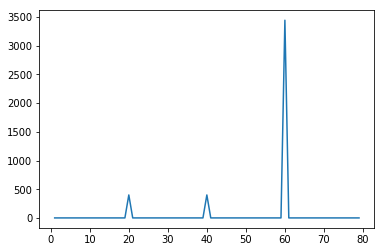

In [11]:
# La somme des carré du signal est égal à la moyenne des modules carrés
data_1D = np.random.rand(V)
dft_1D = np.fft.fft(data_1D)
mod2_1D = np.real(np.conjugate(dft_1D)*dft_1D)
print(np.sum(data_1D**2))
print(np.sum(mod2_1D)/V)

27.658654267470364
27.658654267470368


In [72]:
# Si moyenne nulle, la Nvariance est aussi la somme des carrés des x,  et la moyenne des carré des X
data_1D = data_1D - np.mean(data_1D)
dft_1D = np.fft.fft(data_1D)
mod2_1D = np.real(np.conjugate(dft_1D)*dft_1D)
print(np.sum(mod2_1D)/V)
print(np.var(data_1D)*V)
print(np.sum(data_1D**2))
# Donc la variance peut se calculer par 1/N^2*sum(mod2**2)

0.7470824239373571
0.7470824239373572
0.7470824239373571


In [12]:
# La racine du module en 0 est la somme des x
dft_1D = np.fft.fft(data_1D)
mod2_1D = np.real(np.conjugate(dft_1D)*dft_1D)
print(np.sum(data_1D))
print(np.sqrt(mod2_1D[0]))

44.16259246853794
44.16259246853793


## Le spectre attendu est bien blanc

In [14]:
# Faire une moyenne sur les psd d’une image 2D d’un bruit blanc, moyenner pour estimer |X0|^2, et comparer à la variance moyenne
# On doit retrouver en moyenne l’égalité entre V*H*variance moyenne de l’image, et la moyenne des modules2

vec_psd = []
vec_var = []
vec_mean = []

N_iter = 10 
V = 100
H = 100

for k in range(N_iter):

    data_2D = np.random.rand(V, H)
    vec_mean.append(np.mean(data_2D))
    data_2D = data_2D - np.mean(data_2D)
    dft = np.fft.fft2(data_2D, axes=(0,1))
    mod2 = np.real(np.conjugate(dft)*dft)
    vec_psd.append(mod2)
    vec_var.append(np.var(data_2D))
    
print(vec_var)
print(vec_mean)

mean_psd = np.mean(vec_psd, axis=0)


# LSB2 
print("Var * VH: {}".format(np.mean(vec_var)*V*H))
print("X^2 : {}".format(np.mean(mean_psd)))


[0.08447227884442404, 0.08280275091662677, 0.08349193178175045, 0.0833068964776081, 0.08207222387995887, 0.08380613715636606, 0.0829533730256468, 0.08311539331500403, 0.08210547877146242, 0.08194030833007003]
[0.5011328971871236, 0.5046541355889894, 0.5033850481696576, 0.5018321444780718, 0.5003396130537907, 0.500668596601848, 0.5005737785817912, 0.4980900039015005, 0.5019471012902472, 0.497061776055401]
Var * VH: 830.0667724989177
X^2 : 830.0667724989174


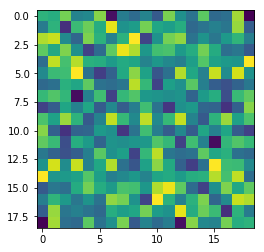

In [22]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(mean_psd[1:, 1:])

In [ ]:
Ajouter du cos4 dans les sequences simulées
Préciser la bande passante due au nombre d’échantillons dans les 3 directions (ex : si acquisition sur 10sec)
Lister les précautions manips à prendre (et les affichers en texte ?)
 

# Affichage des spectres


In [6]:
import numpy as np

import noise3d
from noise3d import spectrum as ns
import matplotlib.pyplot as plt

#T = V = H = 100
T = 20
V = H = 20

stds = (1, 0, 0, 20, 0, 0, 400)
#stds = (1, 1, 1, 1, 1, 1, 1)
#stds = (1, 2, 3, 4, 5, 6, 7)
print([x**2 for x in stds])

seq = noise3d.genseq.genseq_3dnoise_seq(T, V, H, stds)

[1, 0, 0, 400, 0, 0, 160000]


In [3]:
vec_psds = ns.compute_psd(seq)
t, v, h, tv, th, vh, tvh = vec_psds

In [4]:
print(t[0,0,0])
print(v[0,0,0])
print(h[0,0,0])
print(tv[0,0,0])
print(th[0,0,0])
print(vh[0,0,0])
print(tvh[0,0,0])

4.884212685289053e-22
4.884212685289053e-22
4.884212685289053e-22
-4.884212685289054e-22
-4.884212685289054e-22
-4.884212685289054e-22
4.884212685289054e-22


In [5]:
print(ns.compute_var(seq))

(78.96574227648884, 158.40947268284108, 88.65381381104845, 796.7803229072742, 374.9477558658304, 118.21154581020069, 159869.93697991906, 161485.90563327275)


In [ ]:
freq_t = np.fft.fftfreq(T)
freq_v = np.fft.fftfreq(V)
freq_h = np.fft.fftfreq(H)

f_t = np.fft.fftshift(freq_t)

-533265725.07210267
10665314501.442053


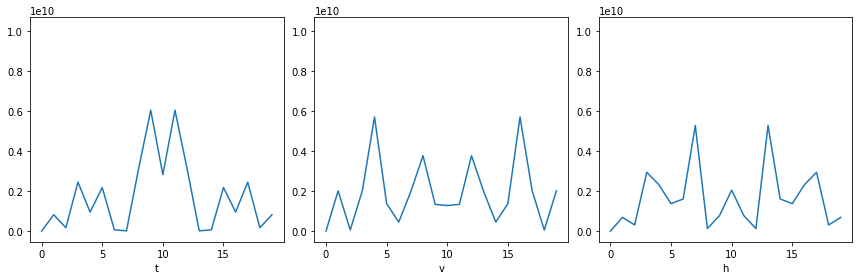

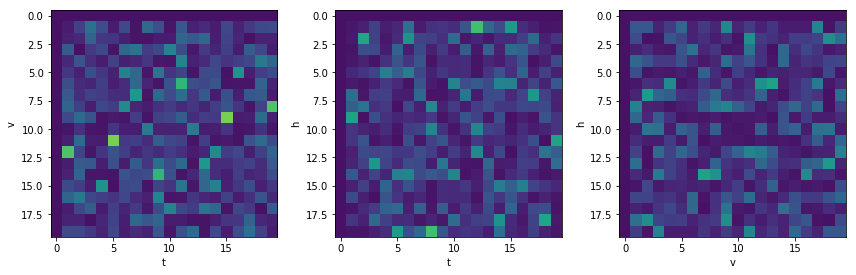

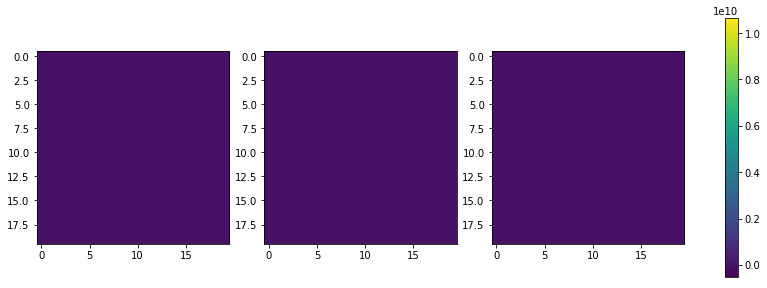

In [6]:

# Spectre de t
#fig, axes = plt.subplots(1, 3)
#axes[0].imshow(t[0, :, :])
#axes[1].imshow(t[:, 0, :])
#axes[2].imshow(t[:, :, 0])
#fig, axes = plt.subplots(1, 3)
#axes[0].imshow(t[0, 1:, 1:])
#axes[1].imshow(t[1:, 0, 1:])
#axes[2].imshow(t[1:, 1:, 0])

xt = 0
xv = 0
xh = 0

share_scale = True


vmin_vec = np.min(vec_psds)
vmax_vec = np.max(vec_psds)
print(vmin_vec)
print(vmax_vec)

# Spectres 1D
psd_t_1D = t[:, xv, xh]
psd_v_1D = v[xt, :, xh]
psd_h_1D = h[xt, xv, :]


# Affichage des spectres 1D
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].plot(psd_t_1D)
axes[0].set_xlabel("t")
axes[1].plot(psd_v_1D)
axes[1].set_xlabel("v")
axes[2].plot(psd_h_1D)
axes[2].set_xlabel("h")
plt.tight_layout()

if share_scale:
    axes[0].set_ylim((vmin_vec, vmax_vec))
    axes[1].set_ylim((vmin_vec, vmax_vec))
    axes[2].set_ylim((vmin_vec, vmax_vec))
    

# Spectres 2D 
psd_tv_2D = tv[:, :, xh]
psd_th_2D = th[:, xv, :]
psd_vh_2D = vh[xt, :, :]


# Affichage des spectres 2D
# add a "sharevminmax"
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
if share_scale:
    axes[0].imshow(psd_tv_2D, vmin=vmin_vec, vmax=vmax_vec)
    axes[1].imshow(psd_th_2D, vmin=vmin_vec, vmax=vmax_vec)
    axes[2].imshow(psd_vh_2D, vmin=vmin_vec, vmax=vmax_vec)
else:
    axes[0].imshow(psd_tv_2D)
    axes[1].imshow(psd_th_2D)
    axes[2].imshow(psd_vh_2D)

axes[0].set_xlabel("t")
axes[0].set_ylabel("v")
axes[1].set_xlabel("t")
axes[1].set_ylabel("h")
axes[2].set_xlabel("v")
axes[2].set_ylabel("h")
    
plt.tight_layout()
# Spectre 3D
psd_tvh_3D = tvh
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
if share_scale:
    axes[0].imshow(psd_tvh_3D[xt, :, :], vmin=vmin_vec, vmax=vmax_vec)
    axes[1].imshow(psd_tvh_3D[:, xv, :], vmin=vmin_vec, vmax=vmax_vec)
    im = axes[2].imshow(psd_tvh_3D[:, :, xh], vmin=vmin_vec, vmax=vmax_vec)
    plt.tight_layout()
    fig.colorbar(im, ax=axes.ravel().tolist())
else:
    axes[0].imshow(psd_tvh_3D[xt, :, :])#, vmin=vmin, vmax=vmax)
    axes[1].imshow(psd_tvh_3D[:, xv, :])#, vmin=vmin, vmax=vmax)
    im = axes[2].imshow(psd_tvh_3D[:, :, xh])#, vmin=vmin, vmax=vmax)
    plt.tight_layout()
    fig.colorbar(im, ax=axes.ravel().tolist())
    

In [7]:
%matplotlib widget

In [28]:
xt = 0
xv = 0
xh = 0


def init_graph(xt=0, xv=0, xh=0, vmin=None, vmax=None):
    fig, axes = plt.subplots(3, 3, figsize=(12, 12))
    axes = axes.ravel()
    axes[0].plot(t[:, xv, xh])
    axes[1].plot(v[xt, :, xh])
    axes[2].plot(h[xt, xv, :])
    axes[3].imshow(tv[:, :, xh], vmin=vmin, vmax=vmax)
    axes[4].imshow(th[:, xv, :], vmin=vmin, vmax=vmax)
    axes[5].imshow(vh[xt, :, :], vmin=vmin, vmax=vmax)
    axes[6].imshow(tvh[xt, :, :], vmin=vmin, vmax=vmax)
    axes[7].imshow(tvh[:, xv, :], vmin=vmin, vmax=vmax)
    axes[8].imshow(tvh[:, :, xh], vmin=vmin, vmax=vmax)

    return axes


def update_graph(axes, xt=0, xv=0, xh=0):
    axes[0].lines[0].set_ydata(t[:, xv, xh])
    axes[1].lines[0].set_ydata(v[xt, :, xh])
    axes[2].lines[0].set_ydata(h[xt, xv, :])
    axes[3].images[0].set_data(tv[:, :, xh])#, vmin=vmin, vmax=vmax)
    axes[4].images[0].set_data(th[:, xv, :])#, vmin=vmin, vmax=vmax)
    axes[5].images[0].set_data(vh[xt, :, :])#, vmin=vmin, vmax=vmax)
    axes[6].images[0].set_data(tvh[xt, :, :])#, vmin=vmin, vmax=vmax)
    axes[7].images[0].set_data(tvh[:, xv, :])#, vmin=vmin, vmax=vmax)
    axes[8].images[0].set_data(tvh[:, :, xh])#, vmin=vmin, vmax=vmax)
    return axes

#def wrap_update(xt, xv, xh):
#    update_graph(axes, xt=xt, xv=xv, xh=xh)
#    plt.tight_layout()

In [29]:
import ipywidgets as ipyw

axes = init_graph();
plt.tight_layout()


@ipyw.interact
def wrap_update(xt=10, xv=10, xh=10):
    update_graph(axes, xt=xt, xv=xv, xh=xh)
    plt.tight_layout()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

interactive(children=(IntSlider(value=10, description='xt', max=30, min=-10), IntSlider(value=10, description=…

interactive(children=(IntSlider(value=10, description='xt', max=30, min=-10), IntSlider(value=10, description=…

In [1]:
from noise3d.disp import disp_spectrum

[1, 0, 0, 400, 0, 0, 160000]


(<Figure size 1008x432 with 10 Axes>,
  <matplotlib.axes._subplots.AxesSubplot at 0x1a1aca4358>])

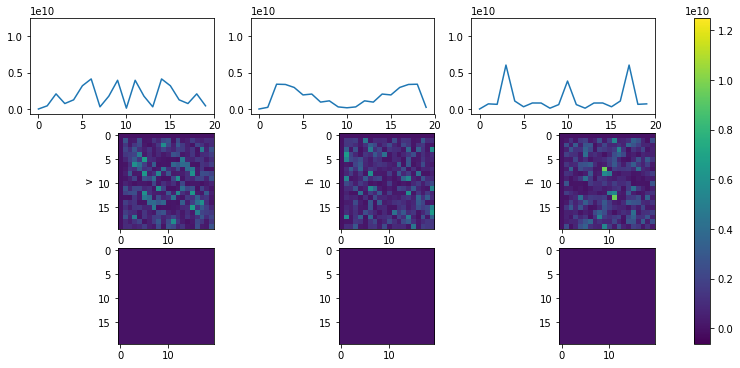

In [8]:
import numpy as np

import noise3d
from noise3d import spectrum as ns
import matplotlib.pyplot as plt

#T = V = H = 100
T = 20
V = H = 20

stds = (1, 0, 0, 20, 0, 0, 400)
#stds = (1, 1, 1, 1, 1, 1, 1)
#stds = (1, 2, 3, 4, 5, 6, 7)
print([x**2 for x in stds])

seq = noise3d.genseq.genseq_3dnoise_seq(T, V, H, stds)


disp_spectrum(seq, figsize=(14,6))


(array([ 3.14159265,  0.64341162, -1.88227132,  0.65479412,  2.73832046,
        -0.57258086,  2.3801285 , -2.61725223,  1.39895214, -0.3208022 ,
         3.14159265]),
 array([0.        , 0.00333333, 0.00666667, 0.01      , 0.01333333,
        0.01666667, 0.02      , 0.02333333, 0.02666667, 0.03      ,
        0.03333333]),
 <matplotlib.lines.Line2D at 0x1a1a719828>)

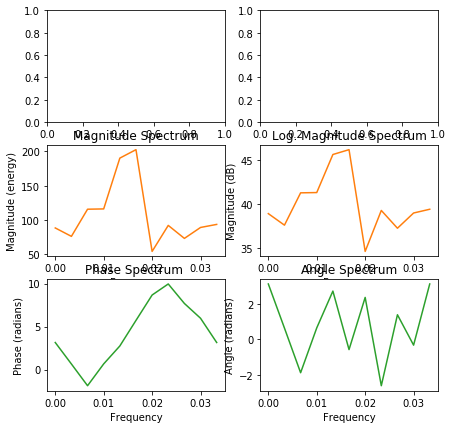

In [16]:
s = seq[0, 0, :]
Fs = 1/15

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(7, 7))
# plot different spectrum types:
axes[1, 0].set_title("Magnitude Spectrum")
axes[1, 0].magnitude_spectrum(s, Fs=Fs, color='C1')

axes[1, 1].set_title("Log. Magnitude Spectrum")
axes[1, 1].magnitude_spectrum(s, Fs=Fs, scale='dB', color='C1')

axes[2, 0].set_title("Phase Spectrum ")
axes[2, 0].phase_spectrum(s, Fs=Fs, color='C2')

axes[2, 1].set_title("Angle Spectrum")
axes[2, 1].angle_spectrum(s, Fs=Fs, color='C2')

In [18]:
ax = axes[0, 1]

In [21]:
ax.angle_spectrum??

Signature:
ax.angle_spectrum(
    x,
    Fs=None,
    Fc=None,
    window=None,
    pad_to=None,
    sides=None,
    *,
    data=None,
    **kwargs,
)
Docstring:
Plot the angle spectrum.

Call signature::

  angle_spectrum(x, Fs=2, Fc=0,  window=mlab.window_hanning,
                 pad_to=None, sides='default', **kwargs)

Compute the angle spectrum (wrapped phase spectrum) of *x*.
Data is padded to a length of *pad_to* and the windowing function
*window* is applied to the signal.

Parameters
----------
x : 1-D array or sequence
    Array or sequence containing the data.

Fs : scalar
    The sampling frequency (samples per time unit).  It is used
    to calculate the Fourier frequencies, freqs, in cycles per time
    unit. The default value is 2.

window : callable or ndarray
    A function or a vector of length *NFFT*. To create window
    vectors see :func:`window_hanning`, :func:`window_none`,
    :func:`numpy.blackman`, :func:`numpy.hamming`,
    :func:`numpy.bartlett`, :func:`scip

SyntaxError: invalid syntax (<ipython-input-24-0a49ca4295ee>, line 1)

In [23]:

import matplotlib

In [25]:
matplotlib.__version__

'3.0.3'

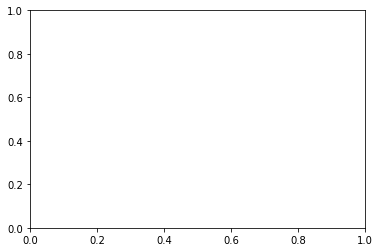

Signature:
ax.angle_spectrum(
    x,
    Fs=None,
    Fc=None,
    window=None,
    pad_to=None,
    sides=None,
    *,
    data=None,
    **kwargs,
)
Docstring:
Plot the angle spectrum.

Call signature::

  angle_spectrum(x, Fs=2, Fc=0,  window=mlab.window_hanning,
                 pad_to=None, sides='default', **kwargs)

Compute the angle spectrum (wrapped phase spectrum) of *x*.
Data is padded to a length of *pad_to* and the windowing function
*window* is applied to the signal.

Parameters
----------
x : 1-D array or sequence
    Array or sequence containing the data.

Fs : scalar
    The sampling frequency (samples per time unit).  It is used
    to calculate the Fourier frequencies, freqs, in cycles per time
    unit. The default value is 2.

window : callable or ndarray
    A function or a vector of length *NFFT*. To create window
    vectors see :func:`window_hanning`, :func:`window_none`,
    :func:`numpy.blackman`, :func:`numpy.hamming`,
    :func:`numpy.bartlett`, :func:`scip

In [29]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1)
ax.angle_spectrum?

In [ ]:
ax.an